In [1]:
from neuralprophet import NeuralProphet

In [3]:
from read_data_no_index import read_data
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
MWG=read_data('D:\MWG.csv')

In [7]:
MWG=MWG[(MWG['Date'] >= '2018-01-01') & (MWG['Date'] <= '2024-06-21')]
MWG=MWG[['Date','Close']]

In [9]:
MWG.columns=['ds','y']

# Train the Model

In [11]:
model = NeuralProphet()
model.fit(MWG)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100


Training: |                                                                                      | 0/? [00:00<…

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (51) is too small than the required number                     for the learning rate finder (230). The results might not be optimal.


Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - D:\Anaconda\Lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - D:\Anaconda\Lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 7. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |                                                                                      | 0/? [00:00<…

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.484621,0.0,39486.597656,48972.328125,0.485267,0.0,0
1,0.287842,0.0,25544.722656,32307.583984,0.285465,0.0,1
2,0.136520,0.0,15174.097656,18567.593750,0.135701,0.0,2
3,0.059380,0.0,8962.097656,10860.433594,0.058818,0.0,3
4,0.046318,0.0,7498.166016,9338.174805,0.046214,0.0,4
...,...,...,...,...,...,...,...
95,0.013686,0.0,3676.890625,4752.202148,0.013532,0.0,95
96,0.013682,0.0,3691.931641,4787.623047,0.013652,0.0,96
97,0.013702,0.0,3709.200684,4779.912598,0.013621,0.0,97
98,0.013676,0.0,3691.171631,4761.262695,0.013532,0.0,98


# Evaluate the Model

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: |                                                                                    | 0/? [00:00<…

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 97.946% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: |                                                                                    | 0/? [00:00<…

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


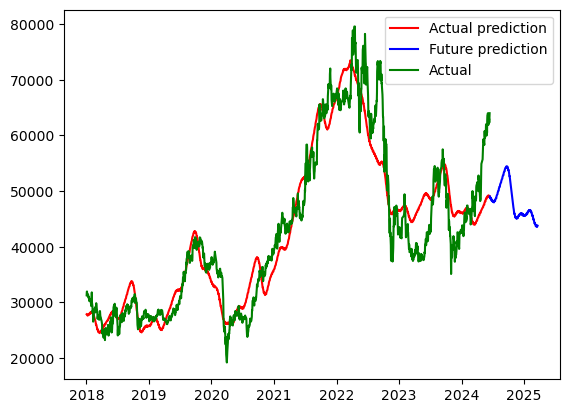

In [13]:
future = model.make_future_dataframe(MWG,periods=200)
forecast = model.predict(future)
actual_prediction=model.predict(MWG)
plt.plot(actual_prediction['ds'],actual_prediction['yhat1'],label='Actual prediction',c='r')
plt.plot(forecast['ds'],forecast['yhat1'],label='Future prediction',c='b')
plt.plot(MWG['ds'],MWG['y'],label='Actual',c='g')
plt.legend()
plt.show()